# Storing Images as NumPy Arrays (using OpenCV imread) to MongoDB database

1. Reading an image from local file system with OpenCV
2. The numpy array of the image representation is obtained
3. The same array is stored to mongoDB database
4. The array is obtained back from the mongoDB database
5. The image is reconstructed

In [1]:
import cv2
from pymongo import MongoClient

In [2]:
import numpy as np

In [3]:
databaseUrl = 'mongodb://localhost/realtimeattendance'
databaseUrl

'mongodb://localhost/realtimeattendance'

Show image from local file system.

In [4]:
anImagePath = './vaasu.png'
imageArray = cv2.imread(anImagePath) # image will be in BGR

In [5]:
from matplotlib import pyplot
%matplotlib inline

In [6]:
np.shape(imageArray)

(207, 156, 3)

In [7]:
imageAsRGB = cv2.cvtColor(imageArray, cv2.COLOR_BGR2RGB)

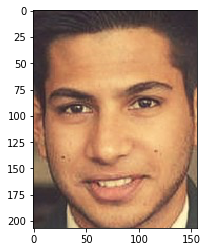

In [8]:
pyplot.imshow(imageAsRGB)

Upload image required data into a document to a mongoDB database.

In [9]:
client = MongoClient(databaseUrl)

In [11]:
collectionName = 'trainedFaces'
databaseName = 'realtimeattendance'
print(databaseUrl)
print('db.' + collectionName)

mongodb://localhost/realtimeattendance
db.trainedFaces


In [12]:
db = client[databaseName]

Encode image to a specific document format.

`format: {
    'name': 'Person X',
    'nparray': BINARYDATA,
    'npshape': (x, y, 3),
    'npdtype': 'int16'
}`

In [16]:
documentForUpload = {
    'name': anImagePath,
    'nparray': imageArray.tobytes(),
    'npshape': imageArray.shape,
    'npdtype': str(imageArray.dtype)
}

In [17]:
db[collectionName].insert_one(documentForUpload)

Retreive uploaded document from the database.

In [18]:
uploadedDocument = db[collectionName].find_one({})

Reconstruct the image and display it.

In [20]:
retrievedImage = np.reshape(
    np.frombuffer(
        uploadedDocument['nparray'],
        dtype = np.dtype(uploadedDocument['npdtype'])
    ),
    uploadedDocument['npshape']
)

In [21]:
retrievedImage.shape

(207, 156, 3)

In [22]:
rgbImage = cv2.cvtColor(retrievedImage, cv2.COLOR_BGR2RGB)

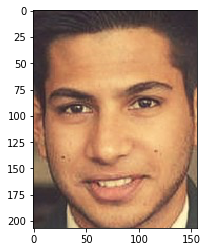

In [23]:
pyplot.imshow(rgbImage)

In [25]:
client.close()